In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

print ("Setup Completed!")

Setup Completed!


In [3]:
# Constants
path_to_dataset = "significant-earthquake-database.csv"

In [4]:
# Loading dataset
data = pd.read_csv(path_to_dataset, index_col="ID Earthquake", sep=";")
data.head()

,Flag Tsunami,Year,Month,Day,Focal Depth,EQ Primary,Mw Magnitude,Ms Magnitude,Mb Magnitude,Ml Magnitude,...,Total Effects : Missing Description,Total Effects : Injuries,Total Effects : Injuries Description,Total Effects : Damages in million Dollars,Total Effects : Damage Description,Total Effects : Houses Destroyed,Total Effects : Houses Destroyed Description,Total Effects : Houses Damaged,Total Effects : Houses Damaged Description,Coordinates
ID Earthquake,,,,,,,,,,,,,,,,,,,,,
78,NaN,334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"41.2, 19.3"
84,Tsunami,344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,SEVERE (~>$5 to $24 million),NaN,NaN,NaN,NaN,"40.3, 26.5"
9989,Tsunami,346,NaN,NaN,NaN,6.8,NaN,6.8,NaN,NaN,...,NaN,NaN,NaN,NaN,MODERATE (~$1 to $5 million),NaN,Many (~101 to 1000 houses),NaN,NaN,"41.4, 19.4"
110,NaN,438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"35.5, 25.5"
9971,Tsunami,557,NaN,NaN,NaN,7.0,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"40.9, 27.6"


In [5]:
columns = list(data.columns)
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {len(columns)}")
print("List of all columns:")
print(columns)

Number of rows: 6208
Number of columns: 42
List of all columns:
['Flag Tsunami', 'Year', 'Month', 'Day', 'Focal Depth', 'EQ Primary', 'Mw Magnitude', 'Ms Magnitude', 'Mb Magnitude', 'Ml Magnitude', 'MFA Magnitude', 'Unknown Magnitude', 'Intensity', 'Country', 'State', 'Location name', 'Region code', 'Earthquake : Deaths', 'Earthquake : Deaths Description', 'Earthquake : Missing', 'Earthquake : Missing Description', 'Earthquake : Injuries', 'Earthquake : Injuries Description', 'Earthquake : Damage (in M$)', 'Earthquake : Damage Description', 'Earthquakes : Houses destroyed', 'Earthquakes : Houses destroyed Description', 'Earthquakes : Houses damaged', 'Earthquakes : Houses damaged Description', 'Total Effects : Deaths', 'Total Effects : Deaths Description', 'Total Effects : Missing', 'Total Effects : Missing Description', 'Total Effects : Injuries', 'Total Effects : Injuries Description', 'Total Effects : Damages in million Dollars', 'Total Effects : Damage Description', 'Total Effects 

## About Dataset

### Context
The Significant Earthquake Database is a global listing of over 5,700 earthquakes from 2150 BC to the present.

### Content
A significant earthquake is classified as one that meets at least one of the following criteria: caused deaths, caused moderate damage (approximately 1 million dollars or more), magnitude 7.5 or greater, Modified Mercalli Intensity (MMI) X or greater, or the earthquake generated a tsunami. The database provides information on the date and time of occurrence, latitude and longitude, focal depth, magnitude, maximum MMI intensity, and socio-economic data such as the total number of casualties, injuries, houses destroyed, and houses damaged, and $ dollage damage estimates. References, political geography, and additional comments are also provided for each earthquake. If the earthquake was associated with a tsunami or volcanic eruption, it is flagged and linked to the related tsunami event or significant volcanic eruption.

### Columns

#### Basic Earthquake Info
<ul>
    <li>Focal Depth - depth of epicenter in meters</li>
    <li>EQ Primary - magnitude of earthquake (primary measured magnitude) from 1 to 10</li>
    <li>Intensity - modified Mercalli intensity from 1 to 12</li>
    <li>Flag Tsunami - true if tsunami earthquake trigged tsunami</li>
</ul>

#### Date
<ul>
    <li>Year</li>
    <li>Month</li>
    <li>Day</li>
</ul>

#### Location
<ul>
    <li>Coordinates - (latitude, longitude)</li>
    <li>Country</li>
    <li>State</li>
    <li>Location name</li>
    <li>Region code</li>
</ul>

#### Magnitudes
The magnitude is a measure of seismic energy. The magnitude scale is logarithmic. An increase of one in magnitude represents a tenfold increase in the recorded wave amplitude. However, the energy release associated with an increase of one in magnitude is not tenfold, but about thirtyfold. For example, approximately 900 times more energy is released in an earthquake of magnitude 7 than in an earthquake of magnitude 5. Each increase in magnitude of one unit is equivalent to an increase of seismic energy of about 1.6 x 10,000,000,000,000 ergs.
All magnitudes have valid values between 0 and 10.

<ul>
    <li>Mw Magnitude 
    <br>
    The Mw magnitude is based on the moment magnitude scale. Moment is a physical quantity proportional to the slip on the fault times the area of the fault surface that slips; it is related to the total energy released in the EQ. The moment can be estimated from seismograms (and also from geodetic measurements). The moment is then converted into a number similar to other earthquake magnitudes by a standard formula. The result is called the moment magnitude. The moment magnitude provides an estimate of earthquake size that is valid over the complete range of magnitudes, a characteristic that was lacking in other magnitude scales.</li>
    <li>Ms Magnitude
    <br>
    The Ms magnitude is the surface-wave magnitude of the earthquake.
    </li>
    <li>Mb Magnitude
    <br>
    The Mb magnitude is the compressional body wave (P-wave) magnitude.
    </li>
    <li>Ml Magnitude
    <br>
    The ML magnitude was the original magnitude relationship defined by Richter and Gutenberg for local earthquakes in 1935. It is based on the maximum amplitude of a seismogram recorded on a Wood-Anderson torsion seismograph. Although these instruments are no longer widely in use, ML values are calculated using modern instrumentation with appropriate adjustments.
    </li>
    <li>MFA Magnitude
    <br>
    The Mfa magnitudes are computed from the felt area, for earthquakes that occurred before seismic instruments were in general use.
    </li>
    <li>Unknown Magnitude
    <br>
    The computational method for the earthquake magnitude was unknown and could not be determined from the published sources.
    </li>
</ul>

#### Earthquake Effects

<ul>
    <li>Earthquake : Deaths</li>
    <li>Earthquake : Deaths Description</li>
    <li>Earthquake : Missing</li>
    <li>Earthquake : Missing Description</li>
    <li>Earthquake : Injuries</li>
    <li>Earthquake : Injuries Description</li>
    <li>Earthquake : Damage (in M$)</li>
    <li>Earthquake : Damage Description</li>
    <li>Earthquakes : Houses destroyed</li>
    <li>Earthquakes : Houses destroyed Description</li>
    <li>Earthquakes : Houses damaged</li>
    <li>Earthquakes : Houses damaged Description</li>
</ul>

#### Total Earthquake Effects

<ul>
    <li>Total Effects : Deaths</li>
    <li>Total Effects : Deaths Description</li>
    <li>Total Effects : Missing</li>
    <li>Total Effects : Missing Description</li>
    <li>Total Effects : Injuries</li>
    <li>Total Effects : Injuries Description</li>
    <li>Total Effects : Damages in million Dollars</li>
    <li>Total Effects : Damage Description</li>
    <li>Total Effects : Houses destroyed</li>
    <li>Total Effects : Houses destroyed Description</li>
    <li>Total Effects : Houses damaged</li>
    <li>Total Effects : Houses damaged Description</li>
</ul>


## Feature Engineering

Feature Engineering will be performed for each of this column groups separately. First we will decide what columns to keeps, measure number of null values and decide what to do with them . Also we will consider does some features needs to be combined in some way for better further analysis.

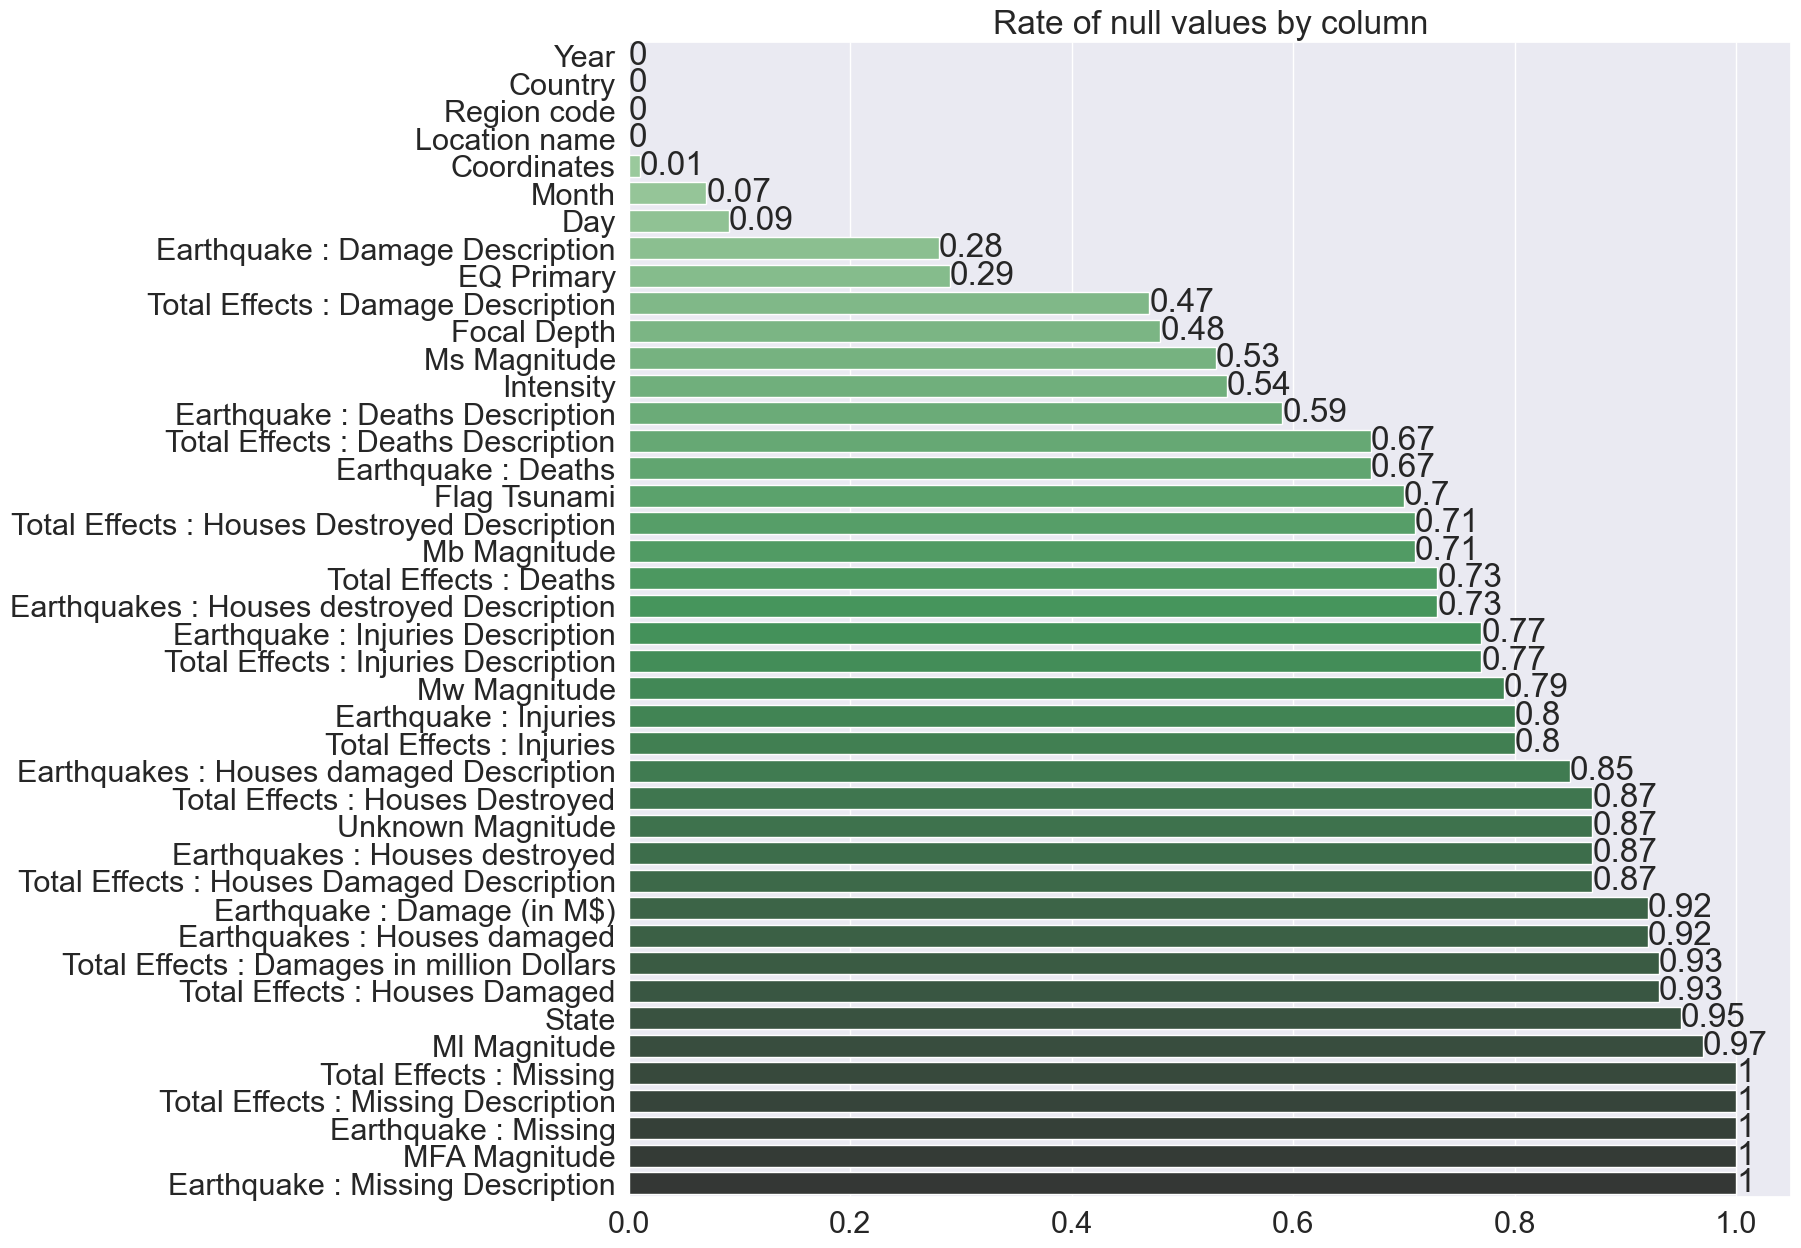

In [12]:
def null_values_by_columns(df):
    null_counts = round(df.isnull().sum() / df.shape[0], 2)
    null_counts = null_counts.sort_values()
    sns.set(font_scale=2, rc={"figure.figsize": (15, 15)})
    ax = sns.barplot(x=null_counts.values, y=null_counts.index, palette="Greens_d")
    ax.bar_label(ax.containers[0])
    plt.title("Rate of null values by column")
    plt.show()

null_values_by_columns(data)

<AxesSubplot: xlabel='Year', ylabel='Count'>

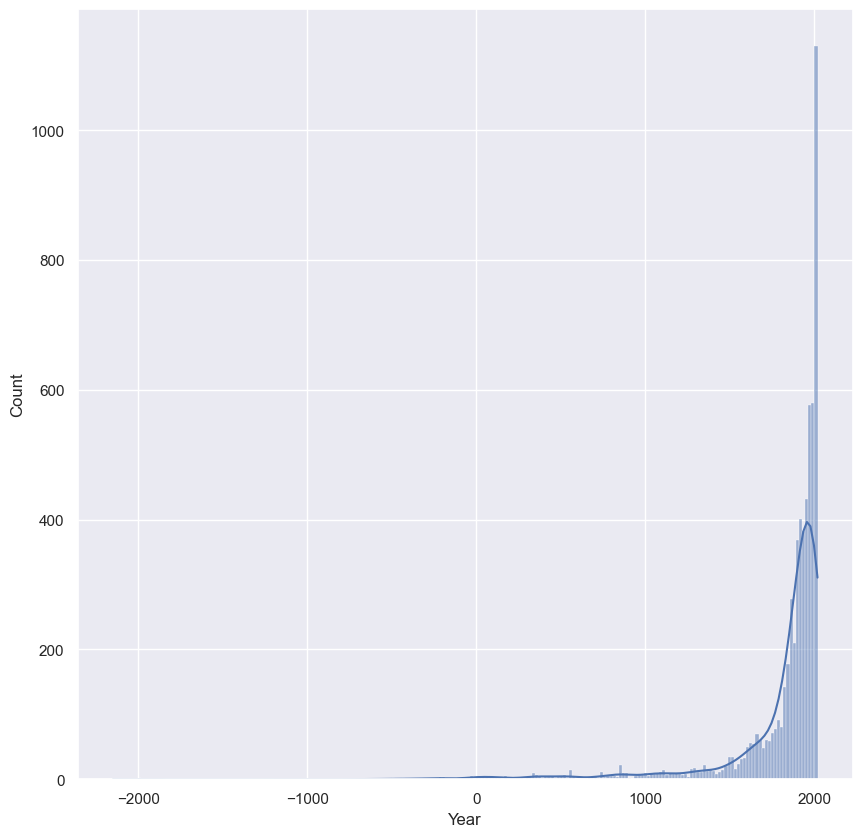

In [13]:

sns.set(font_scale=1, rc={"figure.figsize": (10, 10)})
sns.histplot(data["Year"], kde=True)

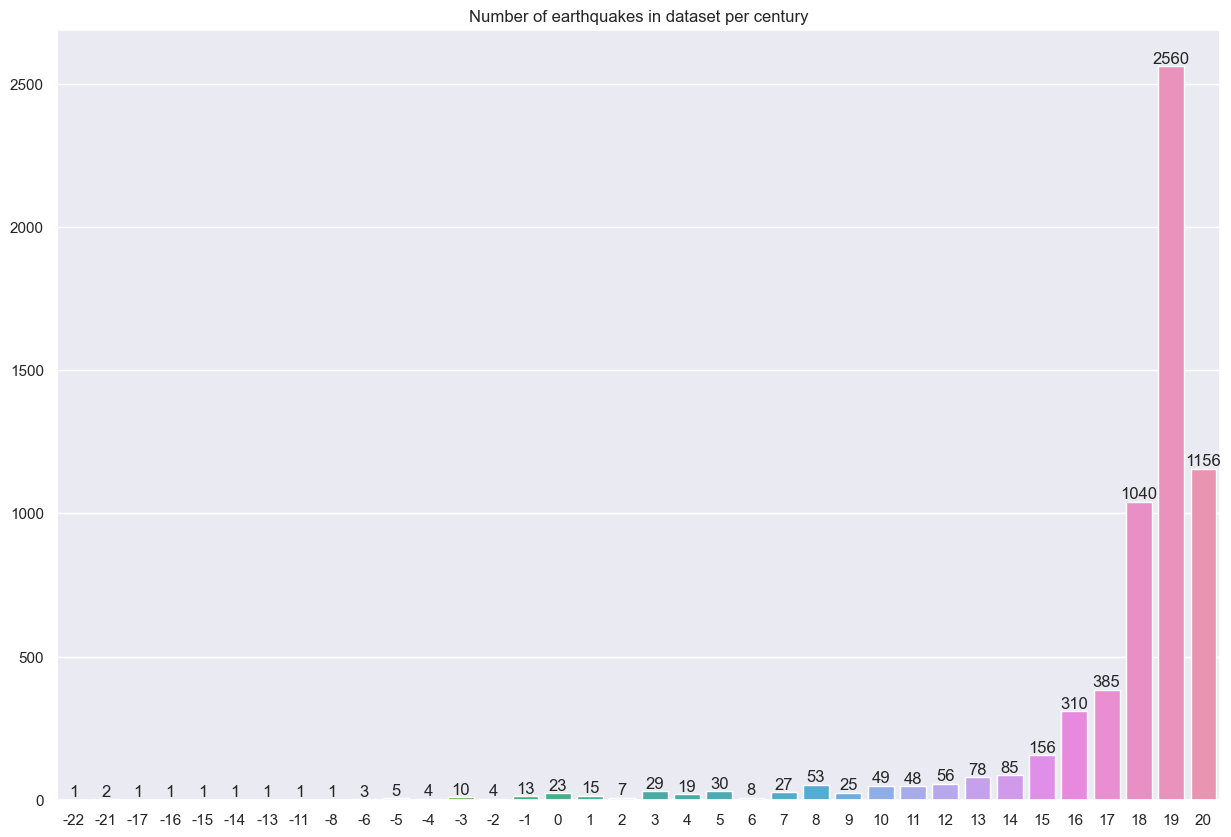

In [24]:
century = ((data["Year"] - 1) // 100).value_counts().sort_index()
sns.set(font_scale=1, rc={"figure.figsize": (15, 10)})
ax = sns.barplot(x=century.index, y=century.values)
ax.bar_label(ax.containers[0])
plt.title("Number of earthquakes in dataset per century")
plt.show()

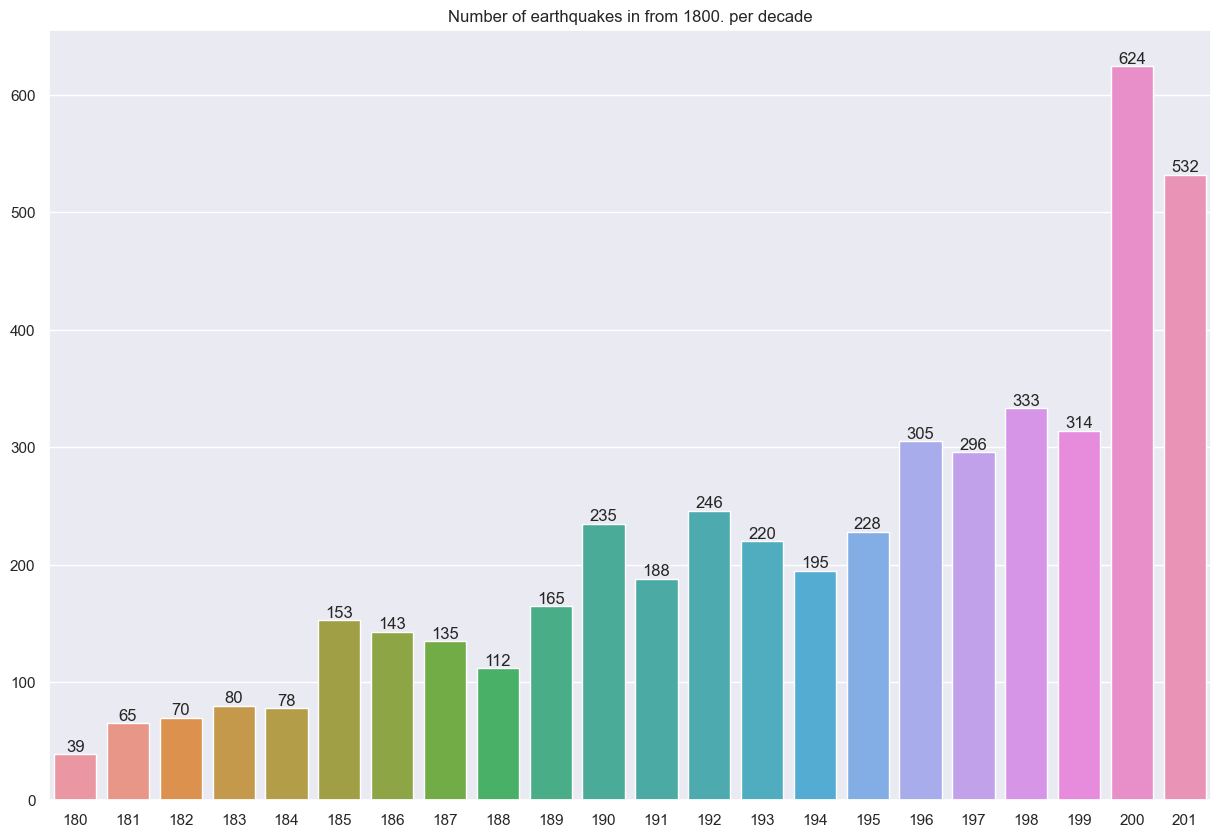

In [27]:
data = data[data["Year"] > 1800]
decades = ((data["Year"] - 1) // 10).value_counts().sort_index()
sns.set(font_scale=1, rc={"figure.figsize": (15, 10)})
ax = sns.barplot(x=decades.index, y=decades.values)
ax.bar_label(ax.containers[0])
plt.title("Number of earthquakes in from 1800. per decade")
plt.show()